# یک طبقه بندی خطی!
در این مسئله ما یک طبقه بند خطی با TensorFlow(TF) خواهیم ساخت که بتواند مسئله جدا سازی دو گروه از نقاط را در یک فضای دوبعدی انحام دهد.






## بخش اول فراخوانی کتاب خانه های لازم


در این بخش ما  دو کتابخانه  TF و numpy(NP), MatPlot(PLT) را فراخوانی میکنیم.

TF: هسته اصلی یادگیری ماشین ما میباشد


NP: هیته اصلی ریاضیاتی


PLT: برای ساخت نمودار

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## ساخت نقاط
حال باید نقاط های مورد نظر رابسازیم . برای این کار از نامپای استفاده و دو آرایه با شیپ 2(تنسور مرتبه دو یا به عبارتی ماتریس) استفاده خواهد شد
در این آرایه ها نقاط ساهته شده دارای میانگین و کوواریانس هستند این دو بایت ایجاد پهنا و پخشی نقاط اضافه شده اند.

In [2]:
num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
                                  #این تابع توزیح نرمال را با چند متغیر لازم انجام میدهد
    mean=[0, 3],                  # این آرگومان میانگین است که تعیین میکند مرکزیت توزیع کجا باشد
    cov=[[1, 0.5], [0.5, 1]],     # کواریانس  پخشی نمونه های تصادفی مارا مشخص میکند
    size=num_samples_per_class)   # تعداد نمونه هایی که میخواهیم
positive_samples = np.random.multivariate_normal(
                                  #این تابع توزیح نرمال را با چند متغیر لازم انجام میدهد
    mean=[3,0],                  # این آرگومان میانگین است که تعیین میکند مرکزیت توزیع کجا باشد
    cov=[[1, 0.5], [0.5, 1]],     # کواریانس  پخشی نمونه های تصادفی مارا مشخص میکند
    size=num_samples_per_class)   # تعداد نمونه هایی که میخواهیم



هم اکنون ما دوتا آزایه (1000٫2) داریم



```
>>>name.shape
OP: (1000,2)
```
حالا برای ادامه کار نیاز داریم این دو آرایه با هم ترکیب بشوند.


برای درک vstack تصویر زیر مناسب است


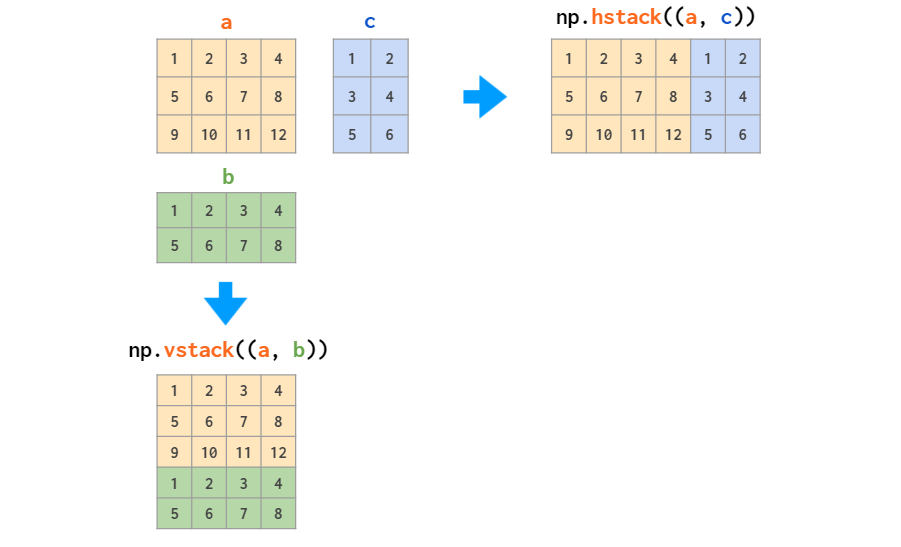

[منبع](https://stackoverflow.com/questions/16473042/numpy-vstack-vs-column-stack)


In [3]:
inputs = np.vstack((negative_samples,positive_samples)).astype(np.float32) # این دو آرایه به صورت عمودی با هم ترکیب شدند و یک آرایه با ابعاد (2000,2 ) ساختند



حال برای هر نقطه یک تارگت یا برچسب میسازیم .



In [4]:
targets = np.vstack((
    np.zeros(( num_samples_per_class, 1),dtype = "float32"),   # برای گروه منفی از آرایه تک بعدی تمام صفر استفاده میکنیم

    np.ones((num_samples_per_class, 1),dtype = "float32")))    # برای گروه مثبت از آرایه تک بعدی تمام یک استفاده میکنیم

# نکته:
# چونکه ما در ترکیب input
# هر دو آرایه را بهصورت عمودی ترکیب کردیم و
# آرایه منفی هم اول بود
# حال اینحا هم باز بهصورت افقی ترکیب می کنیم و برچسب  داده های گروه منفی را ابتدا وارد میکنیم . حال  ارایه نهایی  میشد :
 #(2000, 1)


## نمایش نقاط بر روی نمودار دو بعدی
با ستفاده از  کتابخانه متپلات
حال نقاطی که تاکون ساخته ایم را تمایش میدهیم



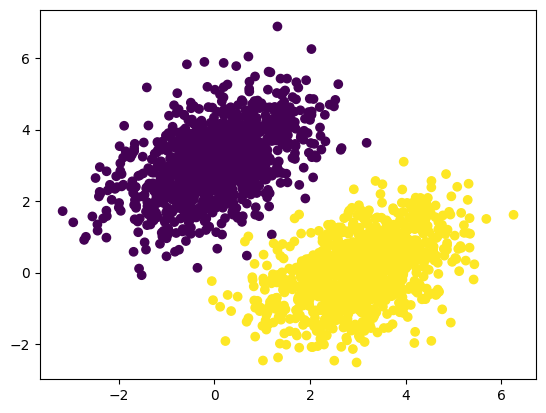

'\nروش کار plt.scatter:\nدر فراخوانی این تابع ما باید حداقل دو آرگومان را ارایه دهیم: محور x و محور y\n این مختصات بهتر است لیست و  باید هم اندزه باشند\n هر نقطه مختصات x به یک نقطه در مختصات y مپ میشود! \n پس باید در پاس دادن این مختصات دقت کرد\n برای مثال کد زیر را اجرا کنید تامفهوم مپ کردن دو به دو را متوجه شوید\n'

In [5]:
plt.scatter(                # از نمودار پراکنده  استفاده میکنیم
            inputs[:, 0],   # محور x را معرفی میکنیم
            inputs[:, 1],   # محور y را معرفی میکنیم
            c=targets[:, 0] # نقاط را علامت میزنیم
           )
plt.show()
'''
روش کار plt.scatter:
در فراخوانی این تابع ما باید حداقل دو آرگومان را ارایه دهیم: محور x و محور y
 این مختصات بهتر است لیست و  باید هم اندزه باشند
 هر نقطه مختصات x به یک نقطه در مختصات y مپ میشود!
 پس باید در پاس دادن این مختصات دقت کرد
 برای مثال کد زیر را اجرا کنید تامفهوم مپ کردن دو به دو را متوجه شوید
'''
# plt.scatter([1,2,3,4], [1,2,3,4] )
# در نمودار بالا نقاط 1.1 2.2 3.3 4.4 محل تقاطع هستند و به همین دلیل نمایش خواهند یافت.

## مدل یادگیری
حال به ساخت مدل یادگیری میرسیم:
هدف این مدل، پیدا مردن خطی است که نقاط زرد را از نقاط بنفش جدا کند و حد اقل خطا (که در این مثال برابر است بامربع فاصله ) را دارا باشد.

میدانیم که این خط برابر  است با:

pridict = W.input + b

{رجوع شود به فصل دو و اوایل فصل ۳  برای توضیحات فرمول بالا}


---

ورودی ما برای مدل یک آرایه دوبعدی خواهد بود(مختصات نقطه)

و خروجی ما یک آرایه تک بعدی (کدام گروه است)


W که آرایه چند بعدی وزن هاست و نیاز به آموزش دارد را با اعداد رندوم وزن دهی میکنیم

b را که بردار وزن هاست و نیاز به آموزش دارد را صفر وزن دهی میکنیم




### متغیر های اولیه مدل

In [6]:
input_dim = 2
output_dim = 1
W =tf.Variable(                         # استفاده از این متد این قابلیت را میدهد که در طول آموزش مقدار این متغیر تغییر کند
    initial_value=tf.random.uniform(    # وزن دهی اولیه با توزیع یک نواخت روی اجام میشود
        shape=(input_dim,output_dim)   #شیپ  این متغیر به میزان شکل ورودی و بعد خرجی است. که برابر با
                                        #(2,1)
    )
)
b = tf.Variable(initial_value=tf.zeros(shape= (output_dim))) # در اینجا ما با یک آرایه مرتببه صفر و فقط صفر ثابت b را مقدار دادیم.


### ساخت مدل قاز پیشرو

خط مد نظر ما در دو بعد کار میکند پس اعمالی که در w دنبال خواد شد دو تا اسکالر ضریب خواهند بود

در حالی که b یک اسکارلر  تنها خواهد بود

برای فاز پیشرو مدل ما باید ضرب ماتریسی بین ورودی ها و w  داشته باشیم
سپس حاصل را با اسکالر b جمع کنیم


{دلیل اوایل فصل ۳}


In [7]:
def model(inputs):                 # ورودی ماتریس حامل تمام مختصات
  return tf.matmul(inputs, W) + b  # ضرب ماتریسی

### تایع ضرر
برای سنجش معیار صحیح کارکرد مدل نیاز هست که تابع ضرری تعیین کنیم


بالاتر به نوع تایع ضرر  و اینکه از چه تایعی استفاده خواهیم کرد اشاره شد

In [8]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)  # این متغیر یک آرایه هم شکل با برچسب ها و پیشبینی ها میباشد که برابر با توان د تفاضل هر نمونه است
  return tf.reduce_mean(per_sample_losses)              # این تابع میانگین تمامی ضرر هایی که بالا گرفته شده است را حساب میکند

### ساخت تابع تمرین دهی

در این تابع ما دسته هایی از نمونه هارا به مدل میدهیم و مدل با استفاده از آن ها خود را آموزش داده و تصحیح میکند

در این مدل از روند batch-training به جای mini-batch-training استفاده خواهیم کرد

مزایا ی بچ ترینینگ شامل این هست که هر دوره آموزش بسیار کارا و مفید خواهد بود

و از معایبش این است که مدل همه نمونه هارا خواهد دید و به همین دلیل بسیار طولانی خواهد بود

برای بچ ترینیگ باید از ضریب یادگیری بزرگتری استفاده شود و دفعات یادگیری کاهش یابد.

In [9]:
learning_rate = 0.1

def training_step(inputs, targers):
  with tf.GradientTape() as tape:           # این تایع مشتق را محاسبه میکند
    predictions = model (inputs)             #فاز پیشرو
    loss = square_loss(predictions, targets) #فاز پیشرو

  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W,b]) # باز هم با استفاده از همان تابع قبلی میتوانیم اظلاعات مورد نیاز برای مدل را استخراج کنیم که در اینجا مما ضرر و دو بردار w b را استخراج کردیم
  W.assign_sub(grad_loss_wrt_W* learning_rate)  # تغییر وزن ها در آرایه w
  b.assign_sub(grad_loss_wrt_b * learning_rate)  # تغییر وزن ها در آرایه b

  return loss

### حلفه تمرین
حالا باید یک حلقه ایجاد کنیم که در آن مدل به آموزش به پردازد.

In [10]:
stp=40
for step in range(stp):
  loss= training_step(inputs, targets)
  if step %5 == 0:
    print(f"Loss at step {step}: {loss:.4f}")


Loss at step 0: 0.8382
Loss at step 5: 0.0732
Loss at step 10: 0.0570
Loss at step 15: 0.0462
Loss at step 20: 0.0390
Loss at step 25: 0.0343
Loss at step 30: 0.0312
Loss at step 35: 0.0291


بعد از انجام دورهای لازم برای آموزش بالاخره مدل به خطای قابل قبولی خواهد رسید.


## نتیجه مدل آموزش دیده
حال که مدل آموزش دیده است لازم است که خط متمایز کننده را بر روی نمودار بیاوریم

اما اول بررسی کنیم ببینیم آیا توانسته ایم که پیشبینی هایی نزدیک به داده های
واقعیمان بیابیم یا نه

PREDICTS


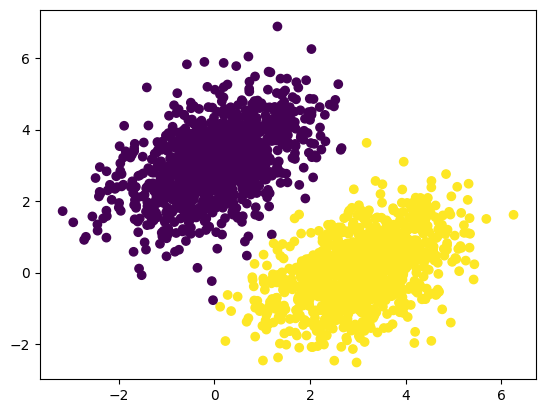

REAL SAMPLES


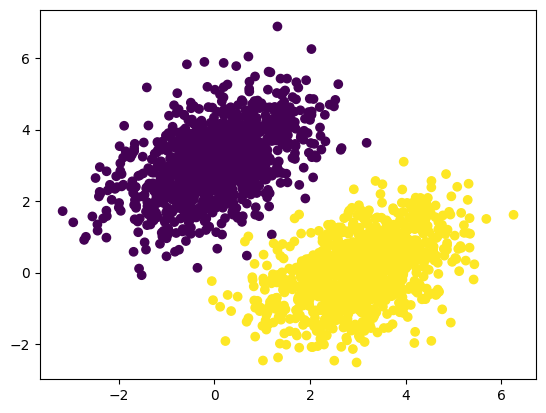

In [11]:
predictions = model(inputs) # الان مدل آموزش دیده است
print("PREDICTS")
plt.scatter(inputs[:, 0],inputs[:, 1], c=predictions[:,0] > 0.5)
plt.show()
 # در این حالت پیشبینیهایی که در آن زیر0.5 باشد گروه 0 و بقیه گروه 1 خواهند بود.

print("REAL SAMPLES")
plt.scatter(                # از نمودار پراکنده  استفاده میکنیم
            inputs[:, 0],   # محور x را معرفی میکنیم
            inputs[:, 1],   # محور y را معرفی میکنیم
            c=targets[:, 0] # نقاط را علامت میزنیم
           )
plt.show()


حال به ساخت خط بپردازیم

با توجه به اینکه میدانیم معادله خط چیست و چه شکلی دارد{ریاضیات دبیرستان!!!}

وزن های بدست آمده را برای معدله خط میسازیم

image.png

این معادله، معادله پیشبینی ما میباشد کهw1,w2 با هم آرایه W هستند.


x,y هم مختصات ورودی


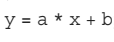
معادله خط


image.pngimage.png
معادله خط متمایز کننده

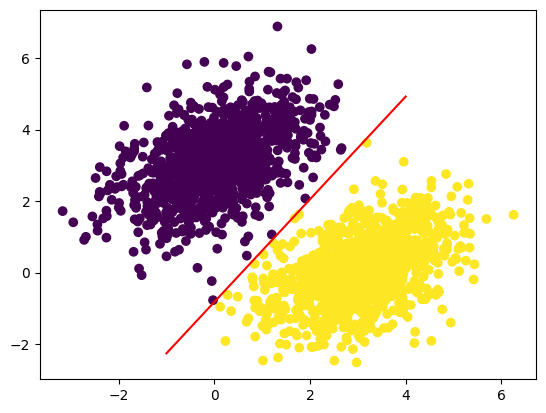

In [12]:
x = np.linspace(-1, 4, 100) #100 عدد با فاصله منظم بین 1- و 4 ایجاد میکند که از آنها برای رسم خط خود استفاده می کنیم.
y = - W[0] / W[1] * x + (0.5 - b) / W[1] # معادله خط اصلی
plt.plot(x, y, "-r")# رسم خط به رنگ قرمز
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)# زسم نمودار پراکنده به همراه خط

# پایان توضیحات کتاب

# از نظر خودم
برای کاوش بیشتر این مدل بیایم چند ورودی دستی بدهیم و بررسی کنیم آیا مدل مناسب رفتار میکند؟